<h1><i>Package fanalysis</i><br /></h1>
<h2>Analyse des Correspondances Multiples</h2>
<p>
Ce tutoriel a pour objectif de présenter rapidement les principales fonctionnalités offertes par le package <i>fanalysis</i> pour réaliser une Analyse des Correspondances Multiples.<br />
Il suppose connu les soubassements théoriques de cette méthode.<br />
Il ne s'attarde pas non plus sur l'interprétation du jeu de données, qui n'a pour but que de présenter les fonctionnalités du package.<br />
2 approches sont présentées :
<ul>
    <li>Une approche "datamining" : l'ACM vise à décrire un jeu de données</li>
    <li>Une approche "machine learning" : l'ACM est utilisée comme méthode de réduction des données, le résultat servant d'entrée pour un modèle prédictif (nous ferons ici l'usage d'outils de scikit-learn).</li>
</ul>
</p>



<h1>I. Approche Datamining</h1>
<p>
L'ACM a ici pour but de décrire un fichier de données.<br />
Celui-ci est extrait du site de Ricco Rakotomalala (Université Lyon 2) :<br />
http://eric.univ-lyon2.fr/%7Ericco/tanagra/fichiers/races_canines_acm.xls<br />
</p>
<p>
Nous partons d'un fichier texte intitulé "mca_data.txt".<br />
On importe la librairie pandas pour charger les données, ainsi que la classe MCA du package <i>fanalysis</i>.<br />
Les données sont transformées en matrice de type numpy.ndarray.
</p>
<p>Dans la matrice de données X, les catégories peuvent être codées :
<ul>
    <li>soit par des entiers</li>
    <li>soit par des chaines de caractères</li>
</ul>
</p>
<p>Dans cet exemple, les catégories sont codées par des chaines de caractère.</p>

In [1]:
import pandas as pd
from fanalysis.mca import MCA
%matplotlib inline

In [2]:
df = pd.read_table("mca_data.txt", header=0, index_col=0, delimiter="\t", encoding="utf-8")

In [3]:
print(df)

                  Taille    Poids Velocite Intelligence Affection Agressivite  \
Chien                                                                           
Beauceron       Taille++   Poids+  Veloc++      Intell+    Affec+     Agress+   
Basset           Taille-   Poids-   Veloc-      Intell-    Affec-     Agress+   
Berger-All      Taille++   Poids+  Veloc++     Intell++    Affec+     Agress+   
Boxer            Taille+   Poids+   Veloc+      Intell+    Affec+     Agress+   
Bull-Dog         Taille-   Poids-   Veloc-      Intell+    Affec+     Agress-   
Bull-Mastif     Taille++  Poids++   Veloc-     Intell++    Affec-     Agress+   
Caniche          Taille-   Poids-   Veloc+     Intell++    Affec+     Agress-   
Chihuahua        Taille-   Poids-   Veloc-      Intell-    Affec+     Agress-   
Cocker           Taille+   Poids-   Veloc-      Intell+    Affec+     Agress+   
Colley          Taille++   Poids+  Veloc++      Intell+    Affec+     Agress-   
Dalmatien        Taille+   P

L'analyse va porter sur les 6 premières variables.

In [4]:
X = df.iloc[:, 0:6].as_matrix()

<p>On crée une instance de la classe MCA, en lui passant ici des étiquettes pour les lignes et les variables. Ces paramètres sont facultatifs ; en leur absence, le programme détermine automatiquement des étiquettes.</p>

In [5]:
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values[0:6])

On estime le modèle en appliquant la méthode <i>fit</i> de la classe MCA sur le jeu de données.

In [6]:
my_mca.fit(X)

MCA(n_components=None,
  row_labels=array(['Beauceron', 'Basset', 'Berger-All', 'Boxer', 'Bull-Dog',
       'Bull-Mastif', 'Caniche', 'Chihuahua', 'Cocker', 'Colley',
       'Dalmatien', 'Doberman', 'Dogue-All', 'Epag.-Breton',
       'Epag.-Français', 'Fox-Hound', 'Fox-Terrier', 'Gd-Bleu-Gasc',
       'Labrador', 'Levrier', 'Mastiff', 'Pekinois', 'Pointer',
       'St-Bernard', 'Setter', 'Teckel', 'Terre-Neuve'], dtype=object),
  stats=True,
  var_labels=array(['Taille', 'Poids', 'Velocite', 'Intelligence', 'Affection',
       'Agressivite'], dtype=object))

<p>
L'exécution de la méthode <i>my_mca.fit(X)</i> provoque a minima le calcul des attributs :
<ul>
    <li><i>my\_pca.eig\_</i> : valeurs propres</li>
    <li><i>my\_pca.row\_coord\_</i> : coordonnées des points lignes</li>
    <li><i>my\_pca.col\_coord\_</i> : coordonnées des points colonnes</li>
</ul>

<h3>I.1. Analyse des valeurs propres</h3>

L'attribut <i>my\_mca.eig\_</i> contient :
<ul>
    <li>en 1ère ligne : les valeurs propres en valeur absolue</li>
    <li>en 2ème ligne : les valeurs propres en pourcentage de la variance totale</li>
    <li>en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale</li>

</ul>

In [7]:
print(my_mca.eig_)

[[  4.81606165e-01   3.84737288e-01   2.10954049e-01   1.57554025e-01
    1.50132670e-01   1.23295308e-01   8.14624601e-02   4.56697566e-02
    2.35419107e-02   7.71303416e-03]
 [  2.88963699e+01   2.30842373e+01   1.26572430e+01   9.45324152e+00
    9.00796020e+00   7.39771849e+00   4.88774761e+00   2.74018539e+00
    1.41251464e+00   4.62782050e-01]
 [  2.88963699e+01   5.19806071e+01   6.46378501e+01   7.40910916e+01
    8.30990518e+01   9.04967703e+01   9.53845179e+01   9.81247033e+01
    9.95372180e+01   1.00000000e+02]]


Les valeurs propres peuvent être représentées graphiquement (par défaut : représentation en valeur absolue).

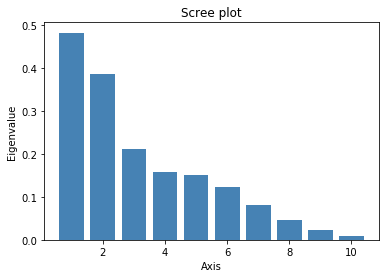

In [8]:
my_mca.plot_eigenvalues()

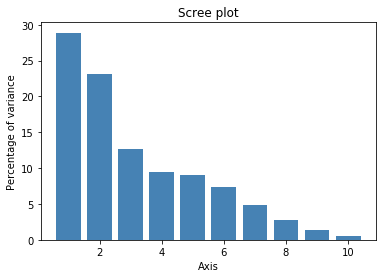

In [9]:
my_mca.plot_eigenvalues(type="percentage")

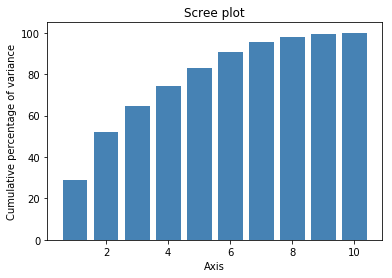

In [10]:
my_mca.plot_eigenvalues(type="cumulative")

<p>Quand l'objet <i>my\_mca</i> a été instancié, son paramètre <i>stats</i> a reçu la valeur True par défaut.<br />
En conséquence, lors de l'exécution de la méthode <i>my\_mca.fit(X)</i>, les statistiques suivantes ont été calculées :
<ul>
    <li><i>my\_mca.row\_contrib\_</i> : contributions des points lignes à la variance de l'axe</li>
    <li><i>my\_mca.col\_contrib\_</i> : contributions des points colonnes à la variance de l'axe</li>
    <li><i>my\_mca.row\_cos2\_</i> : cosinus carrés des points lignes</li>
    <li><i>my\_mca.col\_cos2\_</i> : cosinus carrés des points colonnes</li>
</ul>
</p>
<p>
Si l'on avait souhaité éviter le calcul de ces statistiques pour gagner du temps et économiser des ressources mémoire, il  aurait fallu instancier :<br />
my\_mca = MCA(stats=False)
</p>
<p>
Par défaut, les coordonnées des points lignes et colonnes, leurs contributions et cosinus carrés sont calculés sur l'ensemble des axes extraits de l'analyse.<br />
On aurait toutefois pu spécifier le nombre d'axes à retenir via le paramètre <i>n_components</i> avec par exemple :<br />
my\_mca = MCA(n_components=3)
</p>


<h3>I.2. Extraction des statistiques sur les points lignes</h3>

<h5>Export de la totalité des données lignes vers une DataFrame pandas</h5>
<p>On peut simplement envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points <b>lignes</b>, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).</p>

In [11]:
df_rows = my_mca.row_topandas()

In [12]:
print(df_rows)

                row_coord_dim1  row_coord_dim2  row_coord_dim3  \
Beauceron            -0.317200       -0.417701       -0.101468   
Basset                0.254110        1.101227       -0.190701   
Berger-All           -0.486396       -0.464450       -0.498134   
Boxer                 0.447365       -0.881778        0.692016   
Bull-Dog              1.013352        0.549879       -0.163423   
Bull-Mastif          -0.752574        0.546912        0.497573   
Caniche               0.912301       -0.016188       -0.576570   
Chihuahua             0.840799        0.843852       -0.469947   
Cocker                0.733295        0.079073        0.662230   
Colley               -0.117325       -0.526108       -0.334894   
Dalmatien             0.647240       -0.990184        0.458590   
Doberman             -0.873210       -0.315481       -0.452314   
Dogue-All            -1.047017        0.506958        0.165035   
Epag.-Breton          0.478044       -1.036933        0.061924   
Epag.-Fran

<h5>Statistiques pour les points lignes</h5>

In [13]:
# Coordonnées des points lignes
print(my_mca.row_coord_)

[[ -3.17200051e-01  -4.17701298e-01  -1.01467714e-01  -2.11436281e-01
   -1.18509544e-01  -8.44917274e-01   8.90501548e-02   2.01986411e-01
   -1.67018837e-01  -2.28067149e-02]
 [  2.54109843e-01   1.10122699e+00  -1.90700968e-01   2.92637269e-01
   -5.24008519e-01   3.98946811e-02   5.28331582e-02  -4.47362922e-01
    1.00738366e-01  -1.47102197e-01]
 [ -4.86395534e-01  -4.64449578e-01  -4.98133882e-01   5.77425252e-01
    2.75902052e-01  -5.67764838e-01  -1.29096839e-01   1.87330321e-01
   -2.34185002e-01   8.91993408e-03]
 [  4.47364924e-01  -8.81777941e-01   6.92015804e-01   2.60001835e-01
   -4.55589836e-01  -2.13745841e-01  -3.00768021e-03  -1.98192681e-02
   -2.44628915e-03  -1.40900948e-01]
 [  1.01335218e+00   5.49879489e-01  -1.63423202e-01  -3.49919273e-01
    3.30786485e-01  -2.01414177e-01   6.35440823e-02  -7.90356807e-02
   -3.56024365e-02  -6.65432469e-02]
 [ -7.52574495e-01   5.46911834e-01   4.97573073e-01   6.55152661e-01
    7.21946355e-01   1.17925813e-01  -1.85943

In [14]:
# Contributions des points lignes
print(my_mca.row_contrib_)

[[  7.73767876e-01   1.67959126e+00   1.80760743e-01   1.05091056e+00
    3.46471633e-01   2.14446056e+01   3.60535532e-01   3.30865774e+00
    4.38859435e+00   2.49767800e-01]
 [  4.96577656e-01   1.16741602e+01   6.38490092e-01   2.01310302e+00
    6.77388350e+00   4.78101032e-02   1.26908835e-01   1.62303361e+01
    1.59655665e+00   1.03908074e+01]
 [  1.81937974e+00   2.07658208e+00   4.35652825e+00   7.83787399e+00
    1.87789320e+00   9.68337324e+00   7.57722059e-01   2.84592660e+00
    8.62805061e+00   3.82062375e-02]
 [  1.53910433e+00   7.48497608e+00   8.40776174e+00   1.58913049e+00
    5.12046123e+00   1.37241366e+00   4.11284205e-04   3.18553782e-02
    9.41477848e-04   9.53320231e+00]
 [  7.89705226e+00   2.91076402e+00   4.68895218e-01   2.87834243e+00
    2.69933348e+00   1.21862409e+00   1.83581510e-01   5.06586878e-01
    1.99413231e-01   2.12627267e+00]
 [  4.35555187e+00   2.87943048e+00   4.34672445e+00   1.00900136e+01
    1.28579249e+01   4.17741330e-01   1.57195

In [15]:
# Cos2 des points lignes
print(my_mca.row_cos2_)

[[  8.86354732e-02   1.53699594e-01   9.06978140e-03   3.93822110e-02
    1.23722226e-02   6.28882412e-01   6.98570800e-03   3.59406044e-02
    2.45737810e-02   4.58212084e-04]
 [  3.38043142e-02   6.34867136e-01   1.90385973e-02   4.48320320e-02
    1.43749337e-01   8.33218971e-04   1.46130981e-03   1.04772939e-01
    5.31274484e-03   1.13283712e-02]
 [  1.53722499e-01   1.40163659e-01   1.61231704e-01   2.16645575e-01
    4.94615977e-02   2.09457186e-01   1.08290285e-02   2.28020784e-02
    3.56349731e-02   5.16989317e-05]
 [  1.11330751e-01   4.32523528e-01   2.66393303e-01   3.76048711e-02
    1.15462068e-01   2.54147956e-02   5.03216176e-06   2.18507578e-04
    3.32894680e-06   1.10438146e-02]
 [  6.24484641e-01   1.83880633e-01   1.62415840e-02   7.44623393e-02
    6.65420938e-02   2.46706743e-02   2.45556352e-03   3.79880801e-03
    7.70833162e-04   2.69282992e-03]
 [  2.70690765e-01   1.42958206e-01   1.18328181e-01   2.05144306e-01
    2.49106067e-01   6.64648773e-03   1.65247

<h3>I.3. Extraction des statistiques sur les points colonnes</h3>

<h5>Export de la totalité des données colonnes vers une DataFrame pandas</h5>
<p>On peut envoyer vers une Dataframe : les coordonnées, les contributions et les cos2 de chacun des points <b>colonnes</b>, pour tous les axes factoriels (identifiés par les suffixes dim1, dim2, etc.).</p>

In [16]:
df_cols = my_mca.col_topandas()

In [17]:
print(df_cols)

                       col_coord_dim1  col_coord_dim2  col_coord_dim3  \
Taille_Taille+               0.851088       -1.231720        1.016052   
Taille_Taille++             -0.836675       -0.020578       -0.051217   
Taille_Taille-               1.184956        0.923897       -0.616000   
Poids_Poids+                -0.305405       -0.818876       -0.231272   
Poids_Poids++               -1.015134        0.973901        1.221595   
Poids_Poids-                 1.168918        0.824345       -0.358770   
Velocite_Veloc+              0.603687       -0.887814        0.356312   
Velocite_Veloc++            -0.892100       -0.371832       -0.763088   
Velocite_Veloc-              0.319941        1.044900        0.401729   
Intelligence_Intell+         0.369443       -0.285503        0.493203   
Intelligence_Intell++       -0.335066       -0.459483       -0.599924   
Intelligence_Intell-        -0.349045        0.808555       -0.351511   
Affection_Affec+             0.775496       -0.2669

<h5>Statistiques pour les points colonnes</h5>

In [18]:
# Coordonnées des points colonnes
print(my_mca.col_coord_)

[[ 0.85108805 -1.23171972  1.01605178  0.34245635 -0.31004022  0.11829709
  -0.85830588 -0.25959948  0.30732198 -0.01520824]
 [-0.83667535 -0.02057846 -0.05121744 -0.17022176  0.11266304 -0.04996469
   0.11784406  0.05641401 -0.14463269  0.12155001]
 [ 1.18495571  0.9238965  -0.61599962  0.12014924 -0.0199635   0.02256927
   0.36055265  0.06454103  0.09041149 -0.24960128]
 [-0.30540525 -0.81887572 -0.23127208 -0.11836395 -0.19020146  0.0129084
  -0.03717755 -0.12567337 -0.18494632 -0.09757299]
 [-1.01513413  0.97390062  1.22159452  0.06760494  0.61451838  0.28923175
  -0.06786357  0.64150795  0.20400871 -0.07149381]
 [ 1.16891802  0.82434462 -0.35877044  0.16488382 -0.05122143 -0.20335954
   0.10747545 -0.18101407  0.19615062  0.21543637]
 [ 0.60368666 -0.88781355  0.35631249  0.37024339 -0.37103561  0.62931321
   0.62574307  0.17344491 -0.00882083  0.05378561]
 [-0.89209989 -0.37183247 -0.76308752 -0.23984823 -0.01008873 -0.5321807
  -0.19275804  0.1418371   0.29162795 -0.02074368]
 [

In [19]:
# Contributions des points colonnes
print(my_mca.col_contrib_)

[[  4.64207270e+00   1.21706703e+01   1.51042375e+01   2.29739639e+00
    1.97613161e+00   3.50313262e-01   2.79114015e+01   4.55442881e+00
    1.23822770e+01   9.25524242e-02]
 [  1.34585463e+01   1.01914919e-02   1.15139433e-01   1.70285200e+00
    7.82823704e-01   1.87480502e-01   1.57846191e+00   6.45240301e-01
    8.22749141e+00   1.77362173e+01]
 [  1.25978150e+01   9.58661729e+00   7.77241612e+00   3.95909184e-01
    1.14704658e-02   1.78513713e-02   6.89545420e+00   3.94117907e-01
    1.50033602e+00   3.49020865e+01]
 [  1.67368602e+00   1.50620723e+01   2.19114722e+00   7.68462024e-01
    2.08240645e+00   1.16791442e-02   1.46628075e-01   2.98862105e+00
    1.25563298e+01   1.06671161e+01]
 [  6.60404174e+00   7.60886705e+00   2.18333953e+01   8.95328362e-02
    7.76335649e+00   2.09411430e+00   1.74490143e-01   2.78118821e+01
    5.45645635e+00   2.04534510e+00]
 [  1.40104164e+01   8.72224556e+00   3.01314769e+00   8.52121591e-01
    8.62984888e-02   1.65637063e+00   7.00222

In [20]:
# Cos2 des points colonnes
print(my_mca.col_cos2_)

[[  1.64625197e-01   3.44803059e-01   2.34627550e-01   2.66537163e-02
    2.18465774e-02   3.18050046e-03   1.67429315e-01   1.53163382e-02
    2.14651811e-02   5.25660553e-05]
 [  8.75032050e-01   5.29341341e-04   3.27903251e-03   3.62193103e-02
    1.58662007e-02   3.12058795e-03   1.73590277e-02   3.97817561e-03
    2.61482672e-02   1.84680068e-02]
 [  4.91442014e-01   2.98754660e-01   1.32809435e-01   5.05254394e-03
    1.39489425e-04   1.78280217e-04   4.54993737e-02   1.45794078e-03
    2.86098291e-03   2.18052798e-02]
 [  1.00447166e-01   7.22138784e-01   5.76011410e-02   1.50877186e-02
    3.89594100e-02   1.79444121e-04   1.48849136e-03   1.70087034e-02
    3.68363070e-02   1.02528343e-02]
 [  2.34203931e-01   2.15564186e-01   3.39157541e-01   1.03873360e-03
    8.58256441e-02   1.90125017e-02   1.04669646e-03   9.35301025e-02
    9.45898915e-03   1.16167377e-03]
 [  5.75313407e-01   2.86123812e-01   5.41963075e-02   1.14470212e-02
    1.10468845e-03   1.74126746e-02   4.86356

<h3>I.4. Graphiques</h3>

<p>
2 types de graphiques peuvent être réalisés :
<ul>
    <li>Les mapping classiques qui représentent les points lignes et colonnes sur un plan factoriel</li>
    <li>Des graphiques qui permettent d'interpréter rapidement les axes : on choisit un axe factoriel (le 1er axe dans notre exemple) et on observe quels sont les points lignes et colonnes qui présentent les plus fortes contributions et cos2 pour cet axe</li>
</ul>
</p>
<h5>Graphiques factoriels</h5>

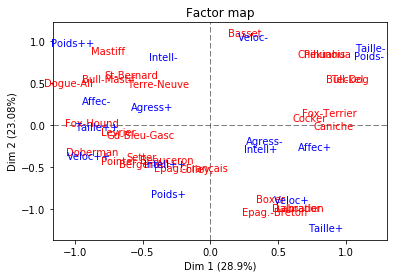

In [21]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=1, num_y_axis=2)

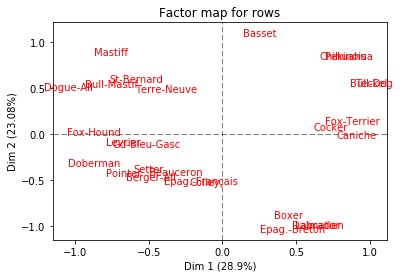

In [22]:
# Mapping des points lignes
my_mca.mapping_row(num_x_axis=1, num_y_axis=2)

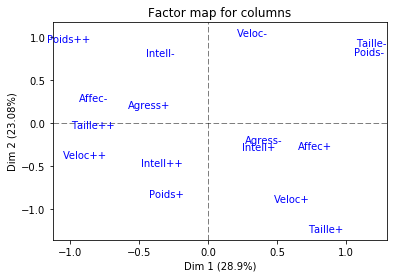

In [23]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2)

Sur les 3 graphiques factoriels précédents, les catégories ne sont pas préfixées par les noms des variables auxquelles elles appartiennent (c'est le choix fait par défaut par le package).<br />
Ce choix est pertinent dans cet exemple car l'omission des préfixes permet d'alléger les graphiques, et il n'y a pas de risque de confusion entre les catégories.<br />
Mais quand l'ensemble des catégories présente des doublons, il est préférable de les préfixer par les noms de variables pour lever toute ambiguïté, ce qui alourdit la présentation.<br />
Dans ce cas, on fixe le paramètre <i>short_labels</i> à <i>False</i>

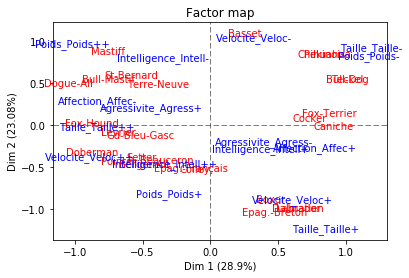

In [24]:
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False)

<h5>Analyse du 1er axe - Points lignes</h5>

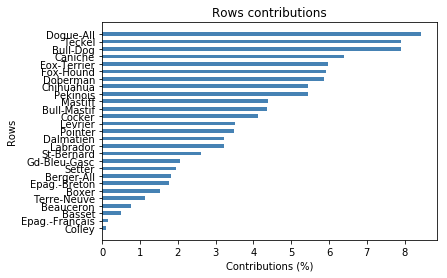

In [25]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_mca.plot_row_contrib(num_axis=1)

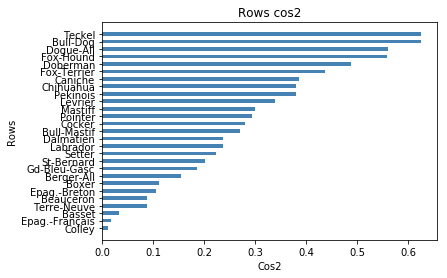

In [26]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_mca.plot_row_cos2(num_axis=1)

<h5>Analyse du 1er axe - Points colonnes</h5>

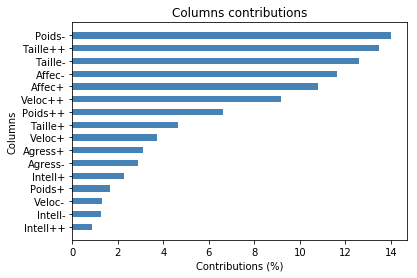

In [27]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_mca.plot_col_contrib(num_axis=1)

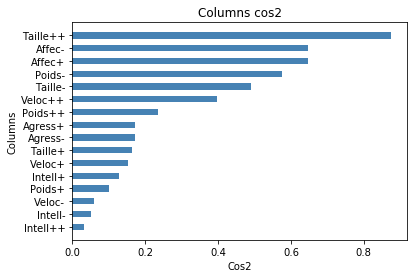

In [28]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_mca.plot_col_cos2(num_axis=1)

Pour ces graphiques produits par les méthodes <i>plot_row_contrib</i>, <i>plot_row_cos2</i>, <i>plot_col_contrib</i>, <i>plot_col_cos2</i>, on peut se limiter à visualiser les x valeurs les plus grandes via le paramètre nb_values.

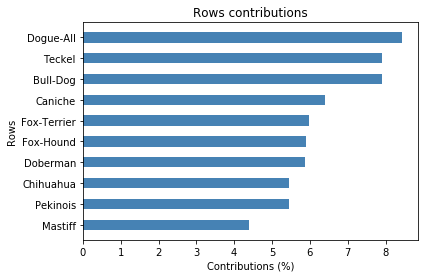

In [29]:
my_mca.plot_row_contrib(num_axis=1, nb_values=10)

Pour tous les graphiques présentés plus haut, il est possible de définir un taille particulière via le paramètre <i>figsize</i>.

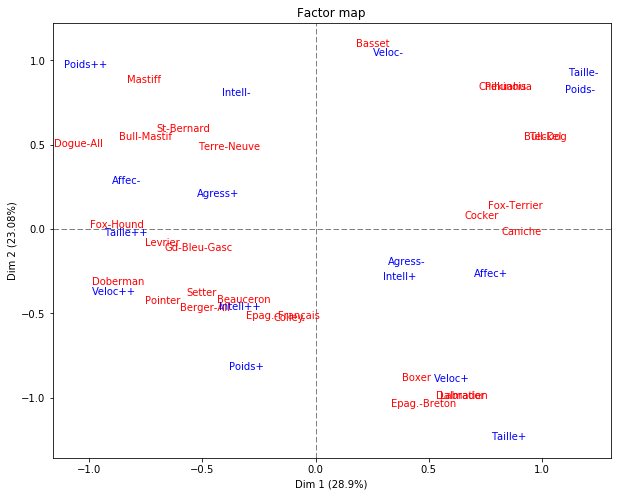

In [30]:
my_mca.mapping(1, 2, figsize=(10, 8))

<h1>II. Approche Machine Learning</h1>
<p>
Ici, l'objectif est d'utiliser l'Analyse des Correspondance Multiples en tant que méthode de prétraitement.
</p>
<p>
La classe MCA implémente les méthodes <i>fit</i>, <i>transform</i> et <i>fit_transform</i> bien connues des utilisateurs de scikit-learn.
</p>
<p>
Il est ici judicieux de fixer le paramètre <i>stats</i> à <i>False</i> pour gagner en temps de traitement et en ressources mémoire.
</p>

In [31]:
my_mca = MCA(stats=False)

In [32]:
my_mca.fit(X)

MCA(n_components=None, row_labels=None, stats=False, var_labels=None)

In [33]:
my_mca.transform(X)

array([[ -3.17200051e-01,  -4.17701298e-01,  -1.01467714e-01,
         -2.11436281e-01,  -1.18509544e-01,  -8.44917274e-01,
          8.90501548e-02,   2.01986411e-01,  -1.67018837e-01,
         -2.28067149e-02],
       [  2.54109843e-01,   1.10122699e+00,  -1.90700968e-01,
          2.92637269e-01,  -5.24008519e-01,   3.98946811e-02,
          5.28331582e-02,  -4.47362922e-01,   1.00738366e-01,
         -1.47102197e-01],
       [ -4.86395534e-01,  -4.64449578e-01,  -4.98133882e-01,
          5.77425252e-01,   2.75902052e-01,  -5.67764838e-01,
         -1.29096839e-01,   1.87330321e-01,  -2.34185002e-01,
          8.91993408e-03],
       [  4.47364924e-01,  -8.81777941e-01,   6.92015804e-01,
          2.60001835e-01,  -4.55589836e-01,  -2.13745841e-01,
         -3.00768021e-03,  -1.98192681e-02,  -2.44628915e-03,
         -1.40900948e-01],
       [  1.01335218e+00,   5.49879489e-01,  -1.63423202e-01,
         -3.49919273e-01,   3.30786485e-01,  -2.01414177e-01,
          6.35440823e-02

In [34]:
my_mca.fit_transform(X)

array([[ -3.17200051e-01,  -4.17701298e-01,  -1.01467714e-01,
         -2.11436281e-01,  -1.18509544e-01,  -8.44917274e-01,
          8.90501548e-02,   2.01986411e-01,  -1.67018837e-01,
         -2.28067149e-02],
       [  2.54109843e-01,   1.10122699e+00,  -1.90700968e-01,
          2.92637269e-01,  -5.24008519e-01,   3.98946811e-02,
          5.28331582e-02,  -4.47362922e-01,   1.00738366e-01,
         -1.47102197e-01],
       [ -4.86395534e-01,  -4.64449578e-01,  -4.98133882e-01,
          5.77425252e-01,   2.75902052e-01,  -5.67764838e-01,
         -1.29096839e-01,   1.87330321e-01,  -2.34185002e-01,
          8.91993408e-03],
       [  4.47364924e-01,  -8.81777941e-01,   6.92015804e-01,
          2.60001835e-01,  -4.55589836e-01,  -2.13745841e-01,
         -3.00768021e-03,  -1.98192681e-02,  -2.44628915e-03,
         -1.40900948e-01],
       [  1.01335218e+00,   5.49879489e-01,  -1.63423202e-01,
         -3.49919273e-01,   3.30786485e-01,  -2.01414177e-01,
          6.35440823e-02

<h5>Intégration dans une Pipeline de scikit-learn</h5>

La class MCA peut être intégrée dans une Pipeline de scikit-learn.<br />
Dans le cadre de notre exemple, nous cherchons à prédire la 7ème variable (variable <i>Fonction</i>) à partir des 6 premières variables du jeu de données.<br />
<i>Fonction</i> est une variable nominale comprenant 3 catégories : "chasse", "compagnie" et "utilite".<br />
Pour la prédire, nous allons utiliser un modèle de régression logistique, qui prendra en input des axes issus d'une Analyse des Correspondances Multiples pratiquée sur les données brutes.<br />
Dans un premier temps, et de façon tout à fait arbitraire, nous fixons le nombre de composantes extraites à 4. 

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [36]:
df = pd.read_table("mca_data.txt", header=0, index_col=0, delimiter="\t", encoding="utf-8")

In [37]:
# X = features
X = df.iloc[:, 0:6].as_matrix()
# y = labels
y = df.iloc[:, 6].as_matrix()

In [38]:
# Construction de la Pipeline
# On enchaine une Analyse des Correspondances Multiples (4 axes retenus) puis une régression logistique multinomiale
pipe = Pipeline([("mca", MCA(n_components=4, stats=False)),
                 ("logit", LogisticRegression(multi_class="multinomial", solver="lbfgs"))])

In [39]:
# Estimation du modèle
pipe.fit(X, y)

Pipeline(steps=[('mca', MCA(n_components=4, row_labels=None, stats=False, var_labels=None)), ('logit', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [40]:
# Prédiction sur l'échantillon de test
print(pipe.predict(X))

['chasse' 'compagnie' 'chasse' 'compagnie' 'compagnie' 'utilite'
 'compagnie' 'compagnie' 'compagnie' 'chasse' 'compagnie' 'utilite'
 'utilite' 'compagnie' 'chasse' 'utilite' 'compagnie' 'utilite' 'compagnie'
 'chasse' 'utilite' 'compagnie' 'chasse' 'utilite' 'chasse' 'compagnie'
 'utilite']


Le paramètre <i>n_components</i> peut faire l'objet d'une optimisation via GridSearchCV de scikit-learn.<br />
Nous reconstruisons donc une Pipeline, sans spécifier de valeur a priori pour <i>n_components</i>.

In [41]:
# Reconstruction d'une Pipeline, sans spécifier de valeur a priori pour n_components
pipe2 = Pipeline([("mca", MCA(stats=False)), ("logit", LogisticRegression(multi_class="multinomial", solver="lbfgs"))])

In [42]:
# Paramétrage de la grille de paramètres
# Attention à l'étendue des valeurs possibles pour mca__n_components !!!
param = [{"mca__n_components": [x + 1 for x in range(10)]}]

In [43]:
# Construction de l'obet GridSearchCV
grid_search = GridSearchCV(pipe2, param_grid=param, scoring="accuracy")

In [44]:
# Estimation du modèle
grid_search.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('mca', MCA(n_components=None, row_labels=None, stats=False, var_labels=None)), ('logit', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'mca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [45]:
# Affichage du score optimal
grid_search.best_score_

0.77777777777777779

In [46]:
# Affichage du paramètre optimal
grid_search.best_params_

{'mca__n_components': 5}

In [47]:
# Prédiction sur l'échantillon de test
grid_search.predict(X)

array(['chasse', 'compagnie', 'chasse', 'compagnie', 'compagnie',
       'utilite', 'compagnie', 'compagnie', 'compagnie', 'chasse',
       'compagnie', 'utilite', 'utilite', 'compagnie', 'chasse', 'chasse',
       'compagnie', 'chasse', 'compagnie', 'chasse', 'utilite',
       'compagnie', 'chasse', 'utilite', 'chasse', 'compagnie', 'utilite'], dtype=object)